<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
try:
    data=pd.read_csv(r'C:\........csv', sep=',')
    pd.set_option('display.max_columns', None) 
except:
    data=pd.read_csv('/............csv', sep=',')
    pd.set_option('display.max_columns', None)

In [4]:
class Preprocessing ():
    def __init__(self, data):
        self.data = data
                
    def evaluation(self): #Общая информация о таблице: статистика, пропуски, дубликаты и т.д.
        information=(display('ИНФОРМАЦИЯ О ДАННЫХ',data.head(10)), display(data.info()), display('СТАТИСТИКА',data.describe()), display(data.describe(include=['object', 'bool'])), display('ЗАВИСИМОСТЬ ПРИЗНАКОВ',data.corr()), display('ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ',data.isna().mean()*100), display('ДУБЛИКАТЫ',data.duplicated().sum()))
        
    def processing(self):#удаление пропущенных значений, дубликатов
        data1=data.copy()
        miss=data1.isna().sum().count()
        if miss>0:
            for col in data1.columns:
                try:
                    data1[col] = data1[col].fillna("Unknown")
                except:
                    data1[col] = data1[col].fillna(np.mean(data1[col]))
            display('Пропуски удалены:', data1.isna().sum())
                                  
        drop = data1.duplicated().sum()
        if drop>0:
            data1=data1.drop_duplicates() 
            drop1=data1.duplicated().sum()
            display('дубликаты удалены, осталось:', drop1)
                            
        sb.set(rc = {'figure.figsize':(30,20)})
        return sb.heatmap(data1.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0)
                
        
    def visual_box(self):# Визуализация выбросовБ с учёном удалённых пропусков и дубликатов    
        data1=data.copy()
        miss=data1.isna().sum().count()
        if miss>0:
            for col in data1.columns:
                try:
                    data1[col] = data1[col].fillna("Unknown")
                except:
                    data1[col] = data1[col].fillna(np.mean(data1[col]))
                                        
        drop = data1.duplicated().sum()
        if drop>0:
            data1=data1.drop_duplicates() 
            drop1=data1.duplicated().sum()
        sb.set(rc = {'figure.figsize':(15,15)})
        return sb.boxplot(data=data1)
    
            
             
    # Если временнoй ряд
    def time(self): # подготовка и сезонность
        data1=data.copy()
        data1.sort_index(inplace=True)
        data1.index.is_monotonic
        data1=data1.resample('1H').sum()
        decomposed = seasonal_decompose(data1)
        plt.figure(figsize=(6, 8))
        plt.subplot(311)

        decomposed.trend.plot(ax=plt.gca())
        plt.title('Тренд')
        plt.subplot(312)
        decomposed.seasonal.plot(ax=plt.gca())
        plt.title('Сезонность')
        plt.subplot(313)
        decomposed.resid.plot(ax=plt.gca())
        plt.title('Остаток')
        plt.tight_layout()
        
    

In [5]:
if __name__ == "__main__":
    proect = Preprocessing(data)

In [6]:
proect.evaluation()


'ИНФОРМАЦИЯ О ДАННЫХ'

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

'СТАТИСТИКА'

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,271174,8,2,250,7,40,2,109,179150
top,2016-03-24 14:49:47,sedan,manual,golf,petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,91457,268251,29232,216352,77013,247161,13719,17


'ЗАВИСИМОСТЬ ПРИЗНАКОВ'

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


'ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ'

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

'ДУБЛИКАТЫ'

4

'Пропуски удалены:'

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

'дубликаты удалены, осталось:'

0

<AxesSubplot:>

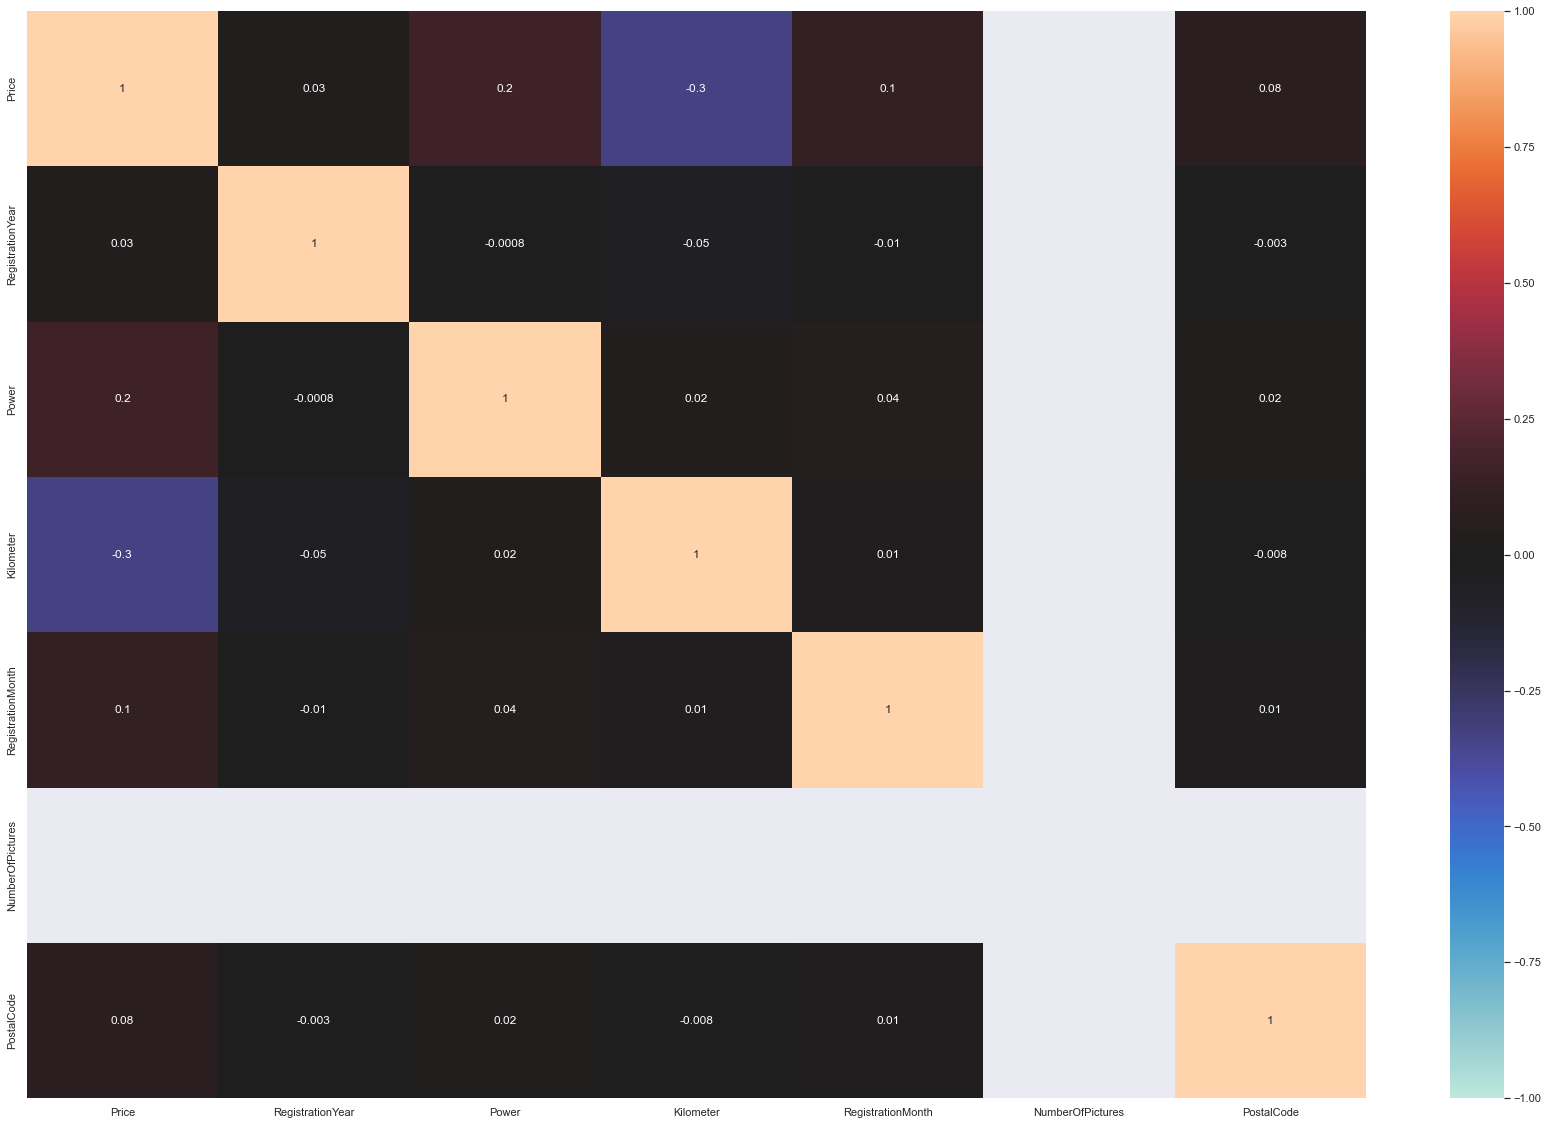

In [7]:
proect.processing()

<AxesSubplot:>

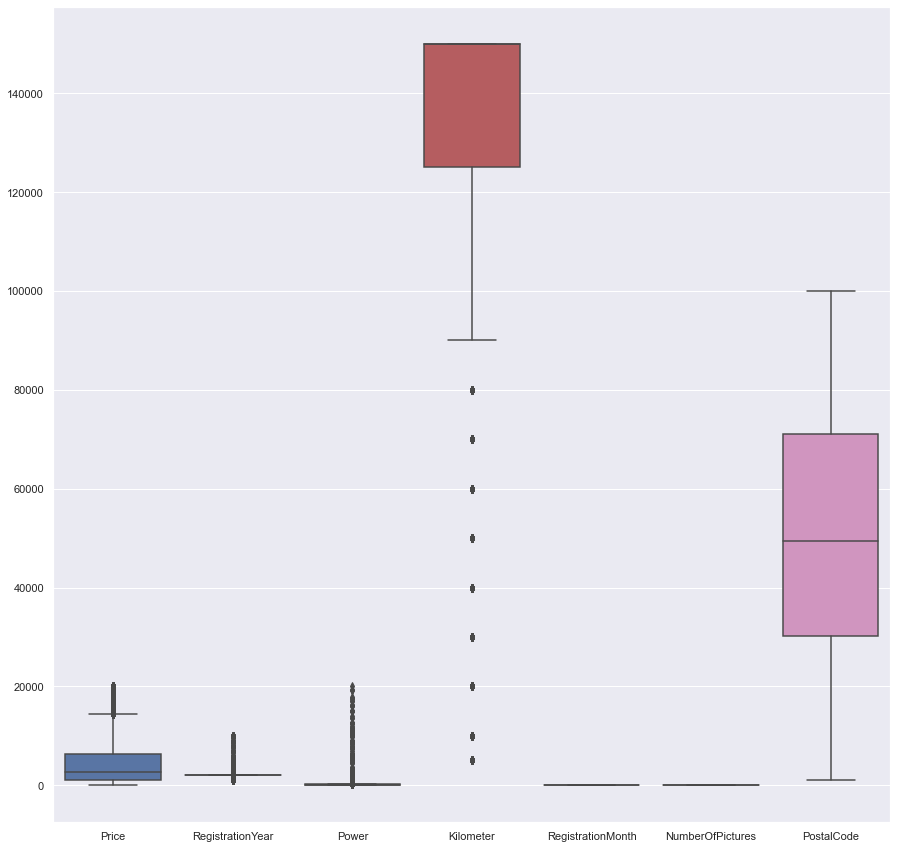

In [8]:
proect.visual_box()

In [9]:
#proect.time()